In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización de los gráficos (opcional)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño predeterminado para los gráficos

In [2]:
# Carga el dataset
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'Mall_Customers.csv' no se encontró. Asegúrate de que esté en la misma carpeta o de que la ruta sea correcta.")
    # Puedes reemplazar con la ruta completa si el archivo no está en la misma carpeta:
    # df = pd.read_csv('/ruta/completa/a/tu/archivo/Mall_Customers.csv')

Dataset cargado exitosamente.


In [3]:
# Mostrar las primeras 5 filas del DataFrame
print("Primeras 5 filas del dataset:")
print(df.head())

# Obtener información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación general del dataset:")
df.info()

# Obtener estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df.describe())

# Comprobar la forma del DataFrame (número de filas y columnas)
print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Comprobar si hay valores nulos en alguna columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras 5 filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 

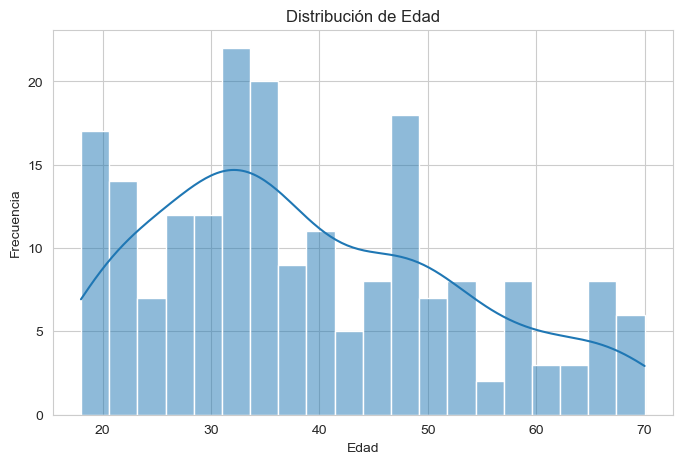

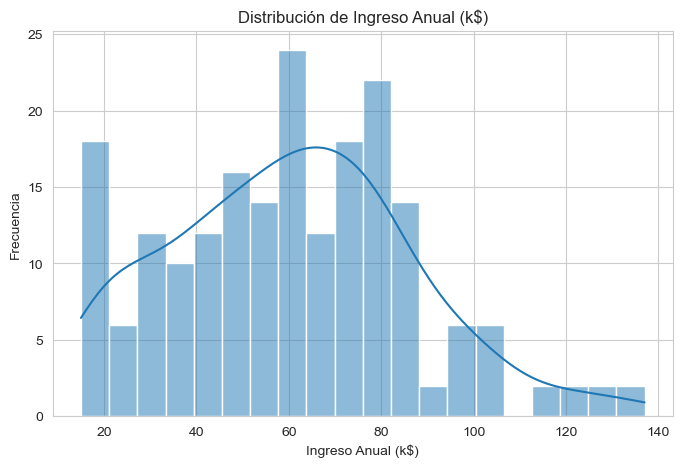

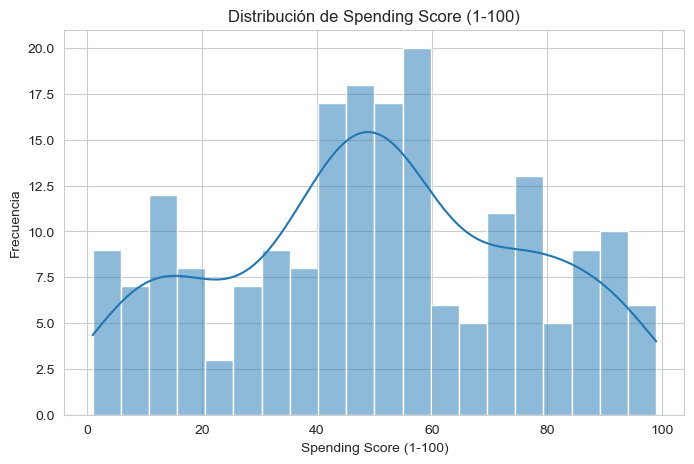

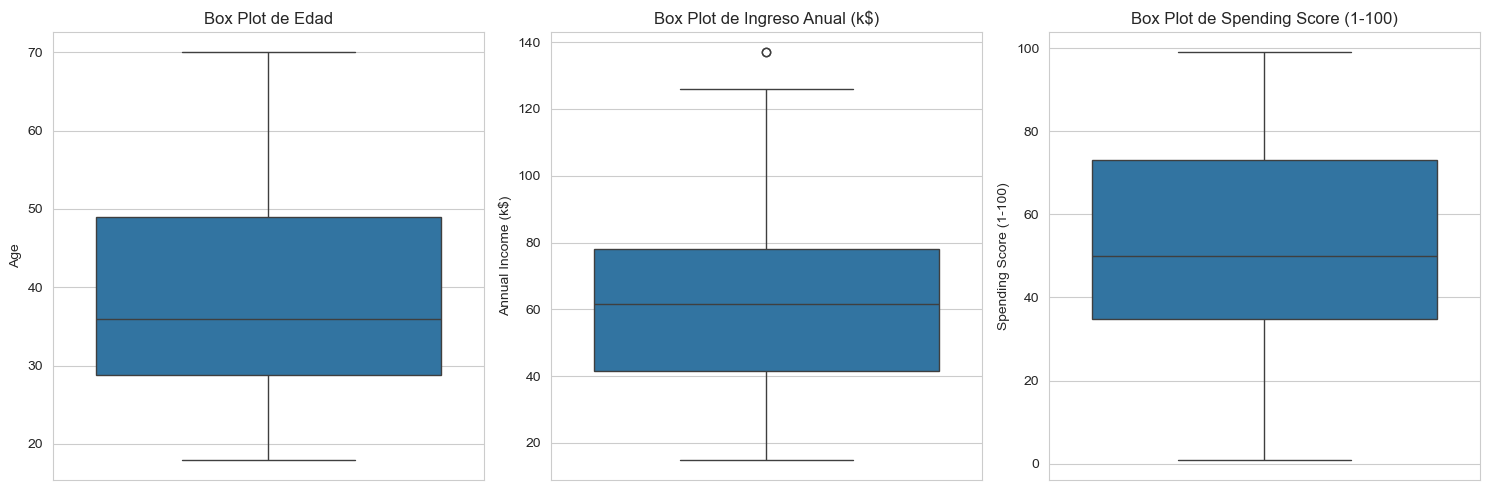

In [4]:
# Histograma de Edad
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Ingreso Anual
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribución de Ingreso Anual (k$)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribución de Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frecuencia')
plt.show()

# Box plots para identificar outliers y la distribución
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot de Edad')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Box Plot de Ingreso Anual (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Box Plot de Spending Score (1-100)')

plt.tight_layout()
plt.show()


Conteo de clientes por Género:
Gender
Female    112
Male       88
Name: count, dtype: int64


C:\Users\proce\AppData\Local\Temp\ipykernel_13060\3184586872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


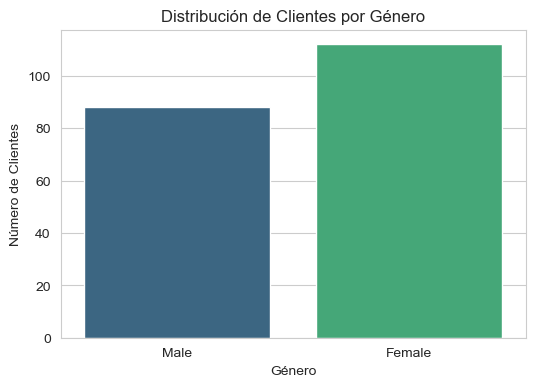

In [5]:
# Conteo de valores para Gender
print("\nConteo de clientes por Género:")
print(df['Gender'].value_counts())

# Gráfico de barras para Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribución de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

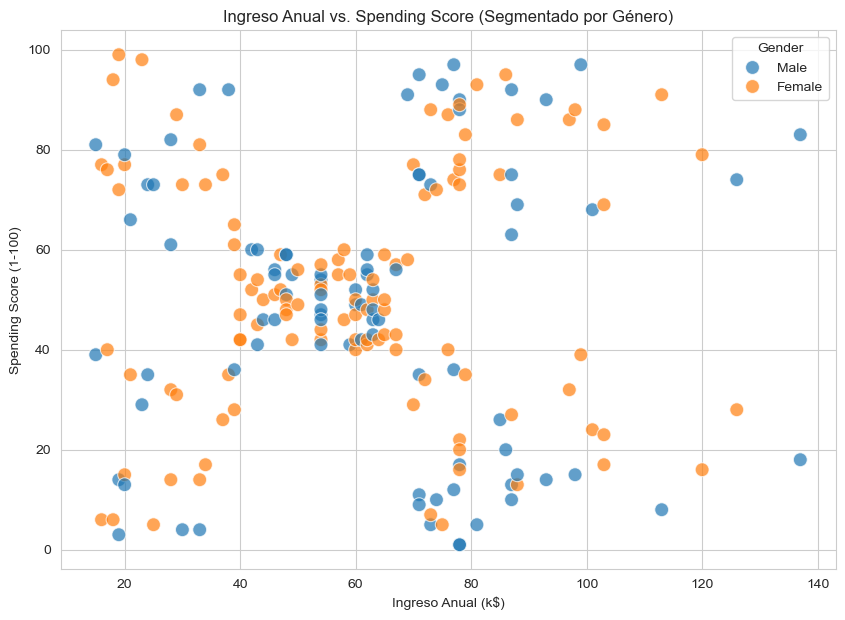

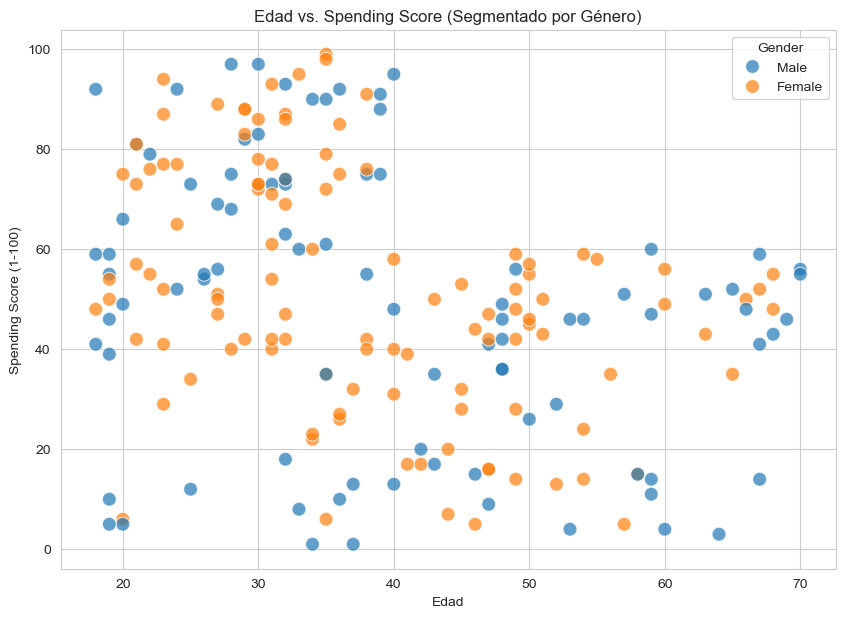


Matriz de Correlación:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


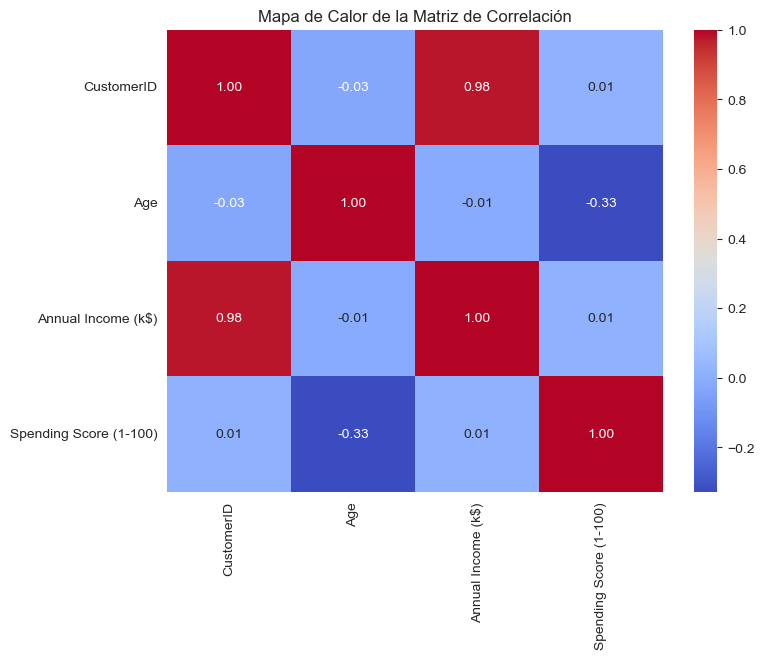

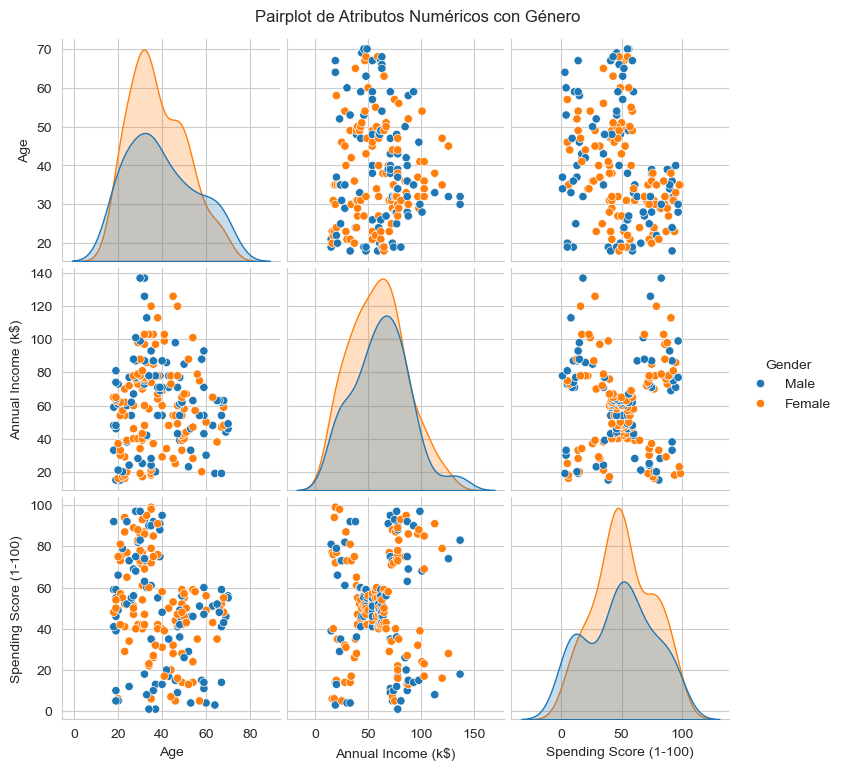

In [6]:
# Diagrama de dispersión entre Ingreso Anual y Spending Score
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', s=100, alpha=0.7)
plt.title('Ingreso Anual vs. Spending Score (Segmentado por Género)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Diagrama de dispersión entre Edad y Spending Score
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', s=100, alpha=0.7)
plt.title('Edad vs. Spending Score (Segmentado por Género)')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Matriz de correlación (solo para columnas numéricas)
# Asegúrate de que las columnas 'CustomerID' y 'Gender' no estén en la correlación si no son numéricas o si no deseas su correlación
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

print("\nMatriz de Correlación:")
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# Pairplot para visualizar todas las relaciones entre pares de columnas numéricas
# Esto es útil si tienes muchas columnas numéricas y quieres un resumen rápido
# Cuidado: Puede ser lento para datasets muy grandes
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot de Atributos Numéricos con Género', y=1.02) # Ajusta el título
plt.show()

In [7]:
# Crea una copia del DataFrame original para no modificarlo directamente si lo necesitas más tarde
df_processed = df.copy()

# Eliminar la columna 'CustomerID'
df_processed = df_processed.drop('CustomerID', axis=1)

print("DataFrame después de eliminar 'CustomerID':")
print(df_processed.head())
print(f"Nueva forma del DataFrame: {df_processed.shape}")

DataFrame después de eliminar 'CustomerID':
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
Nueva forma del DataFrame: (200, 4)


In [8]:
# Aplicar One-Hot Encoding a la columna 'Gender'
df_processed = pd.get_dummies(df_processed, columns=['Gender'], drop_first=False)

print("\nDataFrame después de codificar 'Gender':")
print(df_processed.head())


DataFrame después de codificar 'Gender':
   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  Gender_Male
0   19                  15                      39          False         True
1   21                  15                      81          False         True
2   20                  16                       6           True        False
3   23                  16                      77           True        False
4   31                  17                      40           True        False


In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas a escalar
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])

print("\nDataFrame después del escalado de características:")
print(df_processed.head())
print("\nEstadísticas descriptivas de las columnas escaladas:")
print(df_processed.describe())


DataFrame después del escalado de características:
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0 -1.424569           -1.738999               -0.434801      -1.128152   
1 -1.281035           -1.738999                1.195704      -1.128152   
2 -1.352802           -1.700830               -1.715913       0.886405   
3 -1.137502           -1.700830                1.040418       0.886405   
4 -0.563369           -1.662660               -0.395980       0.886405   

   Gender_Male  
0     1.128152  
1     1.128152  
2    -0.886405  
3    -0.886405  
4    -0.886405  

Estadísticas descriptivas de las columnas escaladas:
                Age  Annual Income (k$)  Spending Score (1-100)  \
count  2.000000e+02        2.000000e+02            2.000000e+02   
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16   
std    1.002509e+00        1.002509e+00            1.002509e+00   
min   -1.496335e+00       -1.738999e+00           -1.910021e+00   
25%   -7.248

In [10]:
# Seleccionar las características para el clustering
# Puedes empezar con estas dos, y luego probar a incluir 'Age' o las variables de género
X = df_processed[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nCaracterísticas seleccionadas para el clustering (primeras 5 filas):")
print(X.head())
print(f"Forma del conjunto de características: {X.shape}")


Características seleccionadas para el clustering (primeras 5 filas):
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980
Forma del conjunto de características: (200, 2)


C:\Users\proce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\proce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\proce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\proce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

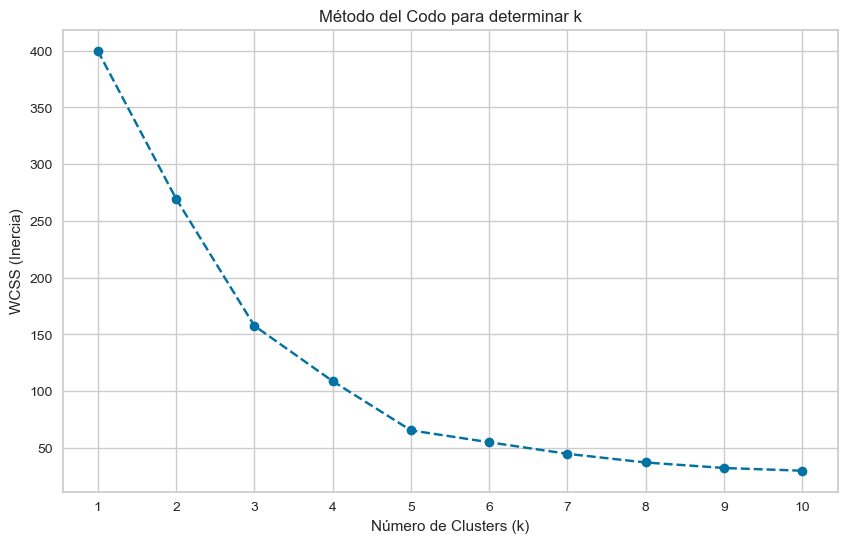

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer # Una herramienta útil para el método del codo

# Asegúrate de que 'X' contiene tus características preprocesadas (ej. 'Annual Income (k$)', 'Spending Score (1-100)')
# Si has estado siguiendo los pasos, 'X' ya debería estar lista.
# Si no, puedes definirla así:
# X = df_processed[['Annual Income (k$)', 'Spending Score (1-100)']]

# Lista para almacenar los valores de inercia (WCSS)
wcss = []

# Rango de valores de k a probar (desde 1 hasta 10 o 15, por ejemplo)
# Se recomienda no empezar desde k=0
for i in range(1, 11): # Probaremos k desde 1 hasta 10
    kmeans_model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_) # Almacena la inercia del modelo

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para determinar k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.xticks(range(1, 11)) # Asegura que los ticks del eje x sean enteros para k
plt.show()

# --- Usando Yellowbrick (opcional, pero muy visual) ---
# Si quieres una visualización más avanzada del método del codo:
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans(random_state=42, n_init=10)
# visualizer = KElbowVisualizer(model, k=(1,11), timings=False) # Rango de 1 a 10 clusters
# visualizer.fit(X)
# visualizer.show()

In [15]:
# Reemplaza `k_optimo` con el valor que hayas identificado del gráfico del codo
k_optimo = 5 # Por ejemplo, si el codo está en 5. ¡Asegúrate de usar tu propio valor!

# Crear el modelo K-Means con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Entrenar el modelo
kmeans_final.fit(X)

# Obtener las etiquetas de cluster para cada punto de datos
cluster_labels = kmeans_final.labels_

# Obtener los centroides de los clusters
centroids = kmeans_final.cluster_centers_

print(f"\nModelo K-Means entrenado con {k_optimo} clusters.")
print("\nPrimeras 10 etiquetas de cluster asignadas:")
print(cluster_labels[:10])
print("\nCentroides de los clusters:")
print(centroids)


Modelo K-Means entrenado con 5 clusters.

Primeras 10 etiquetas de cluster asignadas:
[4 2 4 2 4 2 4 2 4 2]

Centroides de los clusters:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


C:\Users\proce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Asegúrate de que 'X' es tu DataFrame/array de características preprocesadas
# y 'cluster_labels' son las etiquetas que obtuviste de tu modelo K-Means entrenado.

# Calcular el Coeficiente de Silhouette
# Esta métrica mide qué tan similar es un objeto a su propio cluster (cohesión)
# en comparación con otros clusters (separación). Va de -1 a 1.
# Un valor más cercano a 1 indica un mejor agrupamiento.
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Coeficiente de Silhouette: {silhouette_avg:.3f}")

# Calcular el Índice de Calinski-Harabasz
# Esta métrica (también conocida como Variance Ratio Criterion) es la relación
# de la dispersión entre-clusters a la dispersión dentro-clusters.
# Un valor más alto generalmente indica un mejor agrupamiento.
calinski_harabasz_avg = calinski_harabasz_score(X, cluster_labels)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_avg:.3f}")

# Calcular el Índice de Davies-Bouldin
# Esta métrica calcula la similitud promedio entre cada cluster y su cluster más similar.
# Un valor más bajo indica un mejor agrupamiento (clusters más compactos y separados).
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
print(f"Índice de Davies-Bouldin: {davies_bouldin_avg:.3f}")

Coeficiente de Silhouette: 0.555
Índice de Calinski-Harabasz: 248.649
Índice de Davies-Bouldin: 0.572



DataFrame con las etiquetas de cluster K-Means añadidas (primeras 10 filas):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0 -1.424569           -1.738999               -0.434801      -1.128152   
1 -1.281035           -1.738999                1.195704      -1.128152   
2 -1.352802           -1.700830               -1.715913       0.886405   
3 -1.137502           -1.700830                1.040418       0.886405   
4 -0.563369           -1.662660               -0.395980       0.886405   
5 -1.209269           -1.662660                1.001596       0.886405   
6 -0.276302           -1.624491               -1.715913       0.886405   
7 -1.137502           -1.624491                1.700384       0.886405   
8  1.804932           -1.586321               -1.832378      -1.128152   
9 -0.635135           -1.586321                0.846310       0.886405   

   Gender_Male  Cluster_KMeans  
0     1.128152               4  
1     1.128152               2  
2    -0.

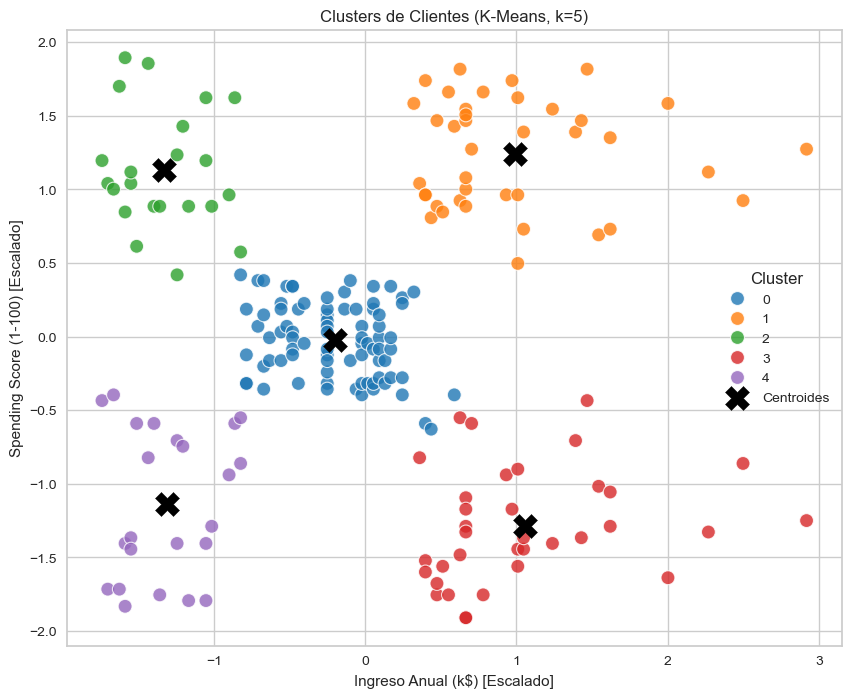

In [17]:
# Añadir las etiquetas de cluster al DataFrame preprocesado (df_processed)
# Esto nos permitirá visualizar los clusters junto con los datos originales
df_processed['Cluster_KMeans'] = cluster_labels

# Opcional: Si quieres ver el DataFrame con las etiquetas añadidas
print("\nDataFrame con las etiquetas de cluster K-Means añadidas (primeras 10 filas):")
print(df_processed.head(10))

# Convertir los centroides a un DataFrame para facilitar la visualización
# Recuerda que los centroides están en el espacio escalado
# Las columnas deben coincidir con las características que usaste para X
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])


# Crear el gráfico de dispersión de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans',
                data=df_processed, palette='tab10', s=100, alpha=0.8, legend='full')

# Dibujar los centroides de los clusters
plt.scatter(centroids_df['Annual Income (k$)'], centroids_df['Spending Score (1-100)'],
            marker='X', s=300, color='black', label='Centroides')

plt.title(f'Clusters de Clientes (K-Means, k={k_optimo})')
plt.xlabel('Ingreso Anual (k$) [Escalado]')
plt.ylabel('Spending Score (1-100) [Escalado]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

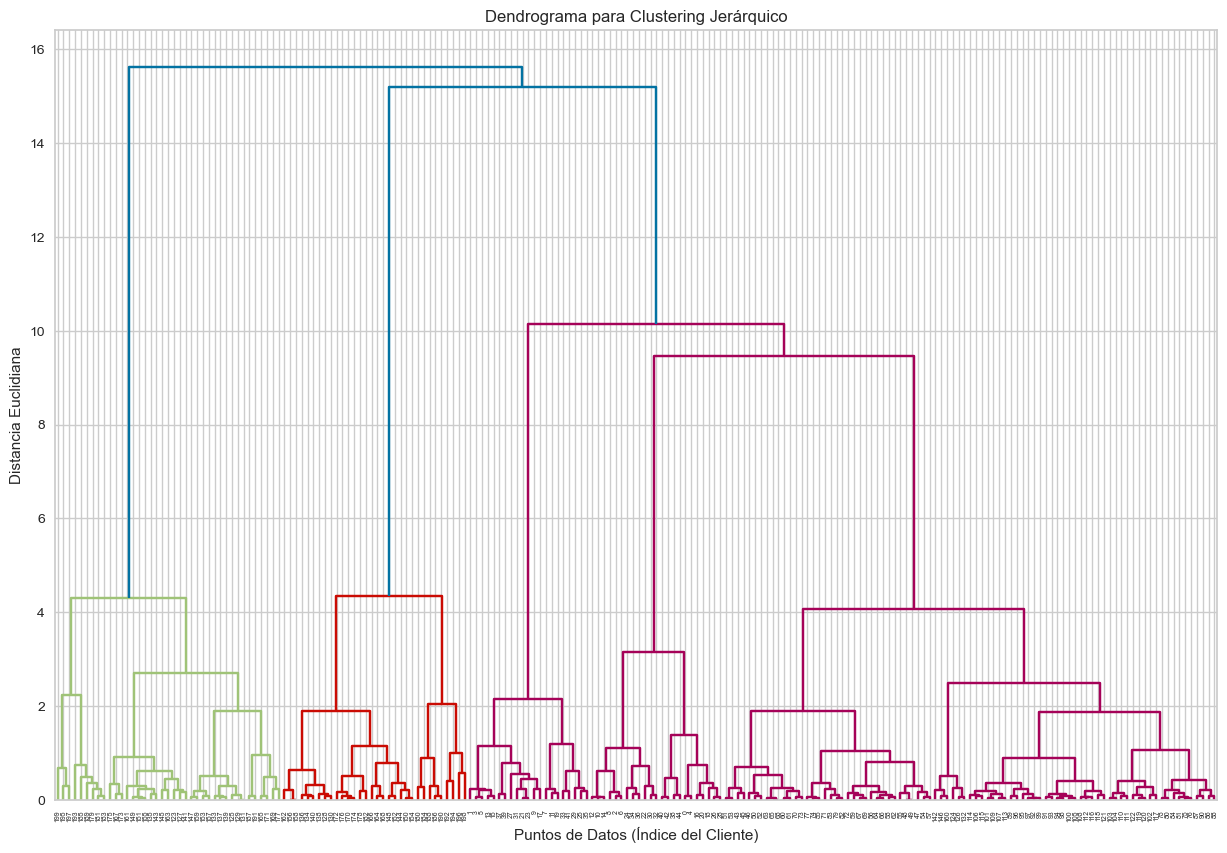

In [18]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Asegúrate de que 'X' es tu DataFrame/array de características preprocesadas
# X = df_processed[['Annual Income (k$)', 'Spending Score (1-100)']]

# Crear el dendrograma
# Usamos 'ward' como método de enlace (linkage method) que minimiza la varianza dentro de cada cluster
plt.figure(figsize=(15, 10))
plt.title("Dendrograma para Clustering Jerárquico")
# 'X.values' para asegurar que estamos pasando un array numpy
dend = shc.dendrogram(shc.linkage(X.values, method='ward'))
plt.xlabel('Puntos de Datos (Índice del Cliente)')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [20]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Reemplaza `n_clusters_jerarquico` con el valor que hayas identificado del dendrograma
n_clusters_jerarquico = 5 # Por ejemplo, si decides 5 clusters del dendrograma. ¡Asegúrate de usar tu propio valor!

# Crear el modelo de Clustering Jerárquico (CORREGIDO: se eliminó affinity='euclidean')
# Utilizamos el mismo método de enlace ('ward') que usamos para el dendrograma
hierarchical_cluster_model = AgglomerativeClustering(n_clusters=n_clusters_jerarquico, linkage='ward')

# Entrenar el modelo y obtener las etiquetas de cluster
cluster_labels_hierarchical = hierarchical_cluster_model.fit_predict(X)

print(f"\nModelo de Clustering Jerárquico entrenado con {n_clusters_jerarquico} clusters.")
print("\nPrimeras 10 etiquetas de cluster asignadas (Clustering Jerárquico):")
print(cluster_labels_hierarchical[:10])


Modelo de Clustering Jerárquico entrenado con 5 clusters.

Primeras 10 etiquetas de cluster asignadas (Clustering Jerárquico):
[4 3 4 3 4 3 4 3 4 3]


In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Asegúrate de que 'X' es tu DataFrame/array de características preprocesadas
# y 'cluster_labels_hierarchical' son las etiquetas que obtuviste del modelo de Clustering Jerárquico.

# Calcular el Coeficiente de Silhouette
# Un valor más cercano a 1 indica un mejor agrupamiento.
silhouette_hierarchical = silhouette_score(X, cluster_labels_hierarchical)
print(f"Coeficiente de Silhouette (Jerárquico): {silhouette_hierarchical:.3f}")

# Calcular el Índice de Calinski-Harabasz
# Un valor más alto generalmente indica un mejor agrupamiento.
calinski_harabasz_hierarchical = calinski_harabasz_score(X, cluster_labels_hierarchical)
print(f"Índice de Calinski-Harabasz (Jerárquico): {calinski_harabasz_hierarchical:.3f}")

# Calcular el Índice de Davies-Bouldin
# Un valor más bajo indica un mejor agrupamiento (clusters más compactos y separados).
davies_bouldin_hierarchical = davies_bouldin_score(X, cluster_labels_hierarchical)
print(f"Índice de Davies-Bouldin (Jerárquico): {davies_bouldin_hierarchical:.3f}")

Coeficiente de Silhouette (Jerárquico): 0.554
Índice de Calinski-Harabasz (Jerárquico): 244.410
Índice de Davies-Bouldin (Jerárquico): 0.578



DataFrame con las etiquetas de cluster Jerárquico añadidas (primeras 10 filas):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0 -1.424569           -1.738999               -0.434801      -1.128152   
1 -1.281035           -1.738999                1.195704      -1.128152   
2 -1.352802           -1.700830               -1.715913       0.886405   
3 -1.137502           -1.700830                1.040418       0.886405   
4 -0.563369           -1.662660               -0.395980       0.886405   
5 -1.209269           -1.662660                1.001596       0.886405   
6 -0.276302           -1.624491               -1.715913       0.886405   
7 -1.137502           -1.624491                1.700384       0.886405   
8  1.804932           -1.586321               -1.832378      -1.128152   
9 -0.635135           -1.586321                0.846310       0.886405   

   Gender_Male  Cluster_KMeans  Cluster_Hierarchical  
0     1.128152               4                   

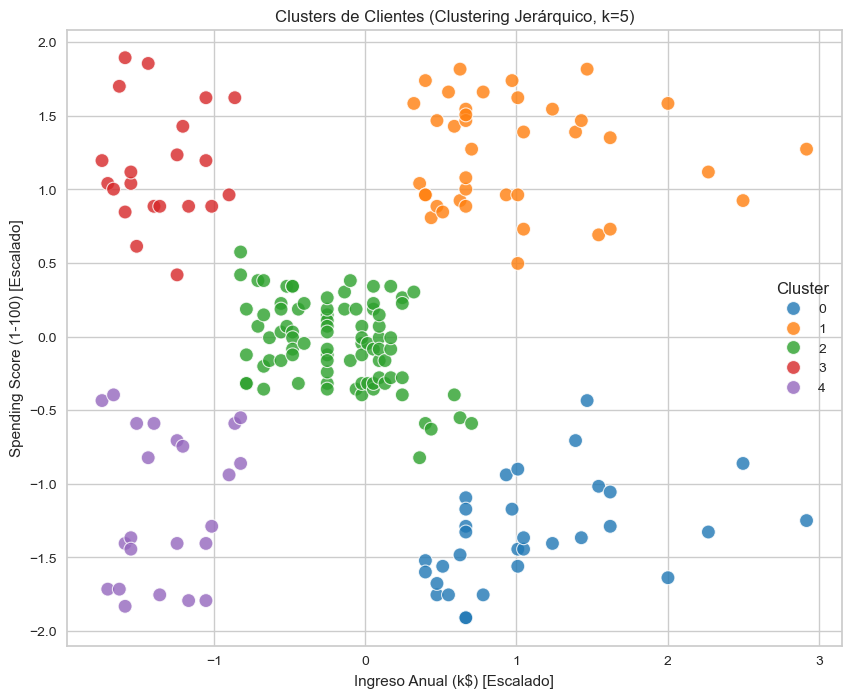

In [22]:
# Añadir las etiquetas de cluster jerárquicas al DataFrame preprocesado
df_processed['Cluster_Hierarchical'] = cluster_labels_hierarchical

# Opcional: Si quieres ver el DataFrame con las etiquetas añadidas
print("\nDataFrame con las etiquetas de cluster Jerárquico añadidas (primeras 10 filas):")
print(df_processed.head(10))

# Crear el gráfico de dispersión de los clusters jerárquicos
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical',
                data=df_processed, palette='tab10', s=100, alpha=0.8, legend='full')

# Si quieres, puedes añadir los centroides de K-Means aquí también para una comparación visual directa,
# aunque el clustering jerárquico no tiene centroides en el mismo sentido que K-Means.
# Para este caso, nos centraremos solo en la visualización de los clusters jerárquicos.

plt.title(f'Clusters de Clientes (Clustering Jerárquico, k={n_clusters_jerarquico})')
plt.xlabel('Ingreso Anual (k$) [Escalado]')
plt.ylabel('Spending Score (1-100) [Escalado]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()